In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pincirollis_data_path = '/workspaces/muBench-experiment/gssi_experiment/gateway_aggregator/pincirolli_results.csv'
synth_df = pd.read_csv(pincirollis_data_path, header=0)
synth_df.describe()

results_base_path = '/workspaces/muBench-experiment/gssi_experiment/gateway_aggregator/results/2023_11_10/'

In [79]:
# Generates data from the step data

cols = ["s3_intensity", "avg_latency_ms"]
df = pd.DataFrame(columns=cols)

max_steps = 25
for step in range(max_steps + 1):
    path = f"{results_base_path}/{step}_steps/mubench_results.csv"
    exp_df = pd.read_csv(path, header=0)
    avg_latency = np.average(exp_df["latency_ms"])
    s3_intensity = step / max_steps
    df.at[step, "s3_intensity"] = s3_intensity
    df.at[step, "avg_latency_ms"] = avg_latency

In [80]:
pinc_df = synth_df[['N_A', 'R0']]
pinc_df.loc[:, 's3_intensity'] = pinc_df['N_A'].transform(lambda x: x / 25)
pinc_df = pinc_df.drop('N_A', axis=1)

df = pd.merge(df, pinc_df, on='s3_intensity')

df

/tmp/ipykernel_97513/2178613000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pinc_df.loc[:, 's3_intensity'] = pinc_df['N_A'].transform(lambda x: x / 25)


,s3_intensity,avg_latency_ms,R0
0,0.0,750.156,449.008131
1,0.04,557.102,430.812565
2,0.08,584.336,414.238789
3,0.12,524.026,401.059061
4,0.16,762.932,387.978857
5,0.2,555.662,378.294597
6,0.24,524.32,368.410305
7,0.28,541.726,359.982102
8,0.32,472.314,351.706090
9,0.36,562.864,344.959313


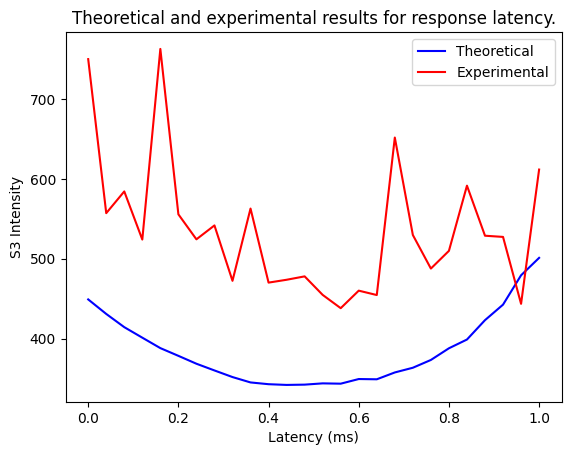

In [81]:
# Create a figure and axis
plt.figure()
ax = plt.axes()

# Plot the first line (sine function)
ax.plot(df['s3_intensity'], df["R0"], label='Theoretical', color='blue')

# Plot the second line (cosine function)
ax.plot(df['s3_intensity'], df['avg_latency_ms'], label='Experimental', color='red')

# Add labels and a legend
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('S3 Intensity')
ax.set_title('Theoretical and experimental results for response latency.')
ax.legend()

# Show the plot
plt.show()

## Compares the delay data set using MAPE and Spearman's r

In [82]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(df["R0"], df["avg_latency_ms"])

# Display the result
print(f"Spearman's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's correlation coefficient: 0.5035897435897435
P-value: 0.008722438866213062
